In [1]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
import os
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


In [2]:
batch_size=32
train_datagen = ImageDataGenerator() 
valid_datagen = ImageDataGenerator() 
test_datagen = ImageDataGenerator() 

train_generator = train_datagen.flow_from_directory(
    directory=r"D:\\Graduation Project\\Dataset\\ICIAR2018_BACH_Challenge\\Dataset\\AugPhotos",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

valid_generator = valid_datagen.flow_from_directory(
    directory=r"D:\\Graduation Project\\Dataset\\ICIAR2018_BACH_Challenge\\Dataset\\Validation",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory=r"D:\\Graduation Project\\Dataset\\ICIAR2018_BACH_Challenge\\Dataset\\Test",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 1882 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [3]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
import tensorflow as tf
img_rows, img_cols, img_channel = 224, 224, 3
base_model = tf.keras.applications.DenseNet169(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(img_rows, img_cols, img_channel), pooling=None)

In [4]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [5]:

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dropout(0.5))

add_model.add(Dense(4, activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy',f1_m,precision_m, recall_m])

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [6]:

def init_callbacks():
  from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
  base_path = "D:\\Graduation Project\\Dataset\\ICIAR2018_BACH_Challenge\\Dataset\\DenseNet169Weights\\"

 
  trained_models_path = base_path + 'model_weights'
  model_names = trained_models_path + '.{epoch:04d}--{val_loss:.4f}--{val_accuracy:.4f}.h5'
  model_checkpoint = ModelCheckpoint(model_names, monitor = 'val_accuracy', verbose=1,save_best_only=False,save_weights_only=True)

  callbacks = [model_checkpoint]
  return callbacks

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
58/58 [==============================] - ETA: 0s - loss: 0.6429 - accuracy: 0.3976 - f1_m: 0.3533 - precision_m: 0.4311 - recall_m: 0.3012 
Epoch 00001: saving model to D:\Graduation Project\Dataset\ICIAR2018_BACH_Challenge\Dataset\DenseNet169Weights\model_weights.0001--0.4765--0.5000.h5
58/58 [==============================] - 1830s 32s/step - loss: 0.6429 - accuracy: 0.3976 - f1_m: 0.3533 - precision_m: 0.4311 - recall_m: 0.3012 - val_loss: 0.4765 - val_accuracy: 0.5000 - val_f1_m: 0.4615 - val_precision_m: 0.6000 - val_recall_m: 0.3750
Epoch 2/100
58/58 [==============================] - ETA: 0s - loss: 0.3557 - accuracy: 0.6778 - f1_m: 0.6530 - precision_m: 0.7579 - recall_m: 0.5769 
Epoch 00002: saving model to D:\Graduation Project\Dataset\ICIAR2018_BACH_Challenge\Dataset\DenseNet169Weights\model_weights.0002--0.3394--0.7500.h5
58/58 [==============================] - 1809s 31s/step - loss: 0.

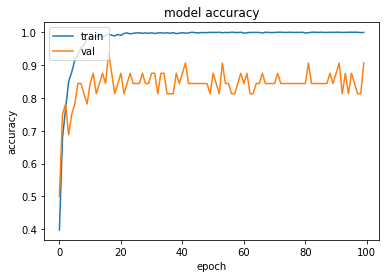

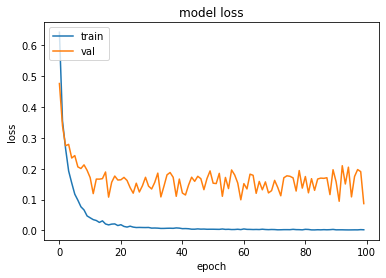

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: D:\Graduation Project\Dataset\ICIAR2018_BACH_Challenge\Dataset\100epochDenseNet169_my_model\assets


In [7]:
#history = model.fit_generator(batch_size=train_generator.samples // batch_size, generator=train_generator, validation_data= validation_generator, validation_steps=validation_generator.samples // batch_size,epochs=25,callbacks= init_callbacks())

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=100,
                    callbacks= init_callbacks()
)


vhistory=model.evaluate_generator(generator=valid_generator,
steps=STEP_SIZE_VALID)

print(vhistory)


STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()

pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]




#Classification Report
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, predicted_class_indices))
print('Classification Report')
target_names = ['Bengin', 'InSitu', 'Invasive','Normal']
print(classification_report(test_generator.classes, predicted_class_indices, target_names=target_names))


y_test = test_generator.classes[test_generator.index_array]

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predicted_class_indices)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,predicted_class_indices,average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,predicted_class_indices,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,predicted_class_indices,average='micro')
print('F1 score: %f' % f1)



#ROC

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# n_classes=4
# for i in range(n_classes):
#     fpr, tpr, _ = metrics.roc_curve(test_generator.classes, predicted_class_indices)

#     roc_auc[i] = auc(fpr[i], tpr[i])
# colors = cycle(['blue', 'red', 'green','orange'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))
# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([-0.05, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class data')
# plt.legend(loc="lower right")
# plt.show()





filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("D:\\Graduation Project\\Dataset\\ICIAR2018_BACH_Challenge\\Dataset\\100epochDenseNet169results.csv",index=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

!mkdir -p saved_model
model.save('D:\\Graduation Project\\Dataset\\ICIAR2018_BACH_Challenge\\Dataset\\100epochDenseNet169_my_model')